<a href="https://colab.research.google.com/github/dilp90/PhD_ExperimentalSetup/blob/main/LARS2025/MyoelectricControl_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **First ANN**


In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [2]:
# ===============================
# 1. Cargar tus datos (ejemplo)
# ===============================
# Si ya los guardaste en CSV:
df = pd.read_csv("/content/AllData.csv")

X = df["Filtered_EMG"].values.reshape(-1, 1)  # Entrada (reshape porque es 1D)
y = df["Roll_Angle"].values.reshape(-1, 1)  # Salida

In [3]:
# ===============================
# 2. División en train/test 80/20
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
# ===============================
# 3. Definir la red neuronal
# ===============================
model = Sequential()

# Capa oculta con 3 neuronas, entrada de 1 característica
model.add(Dense(3, activation='sigmoid', input_shape=(1,)))

# Capa de salida con 1 neurona
model.add(Dense(1, activation='linear'))

# ===============================
# 4. Compilar el modelo
# ===============================
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [6]:
# ===============================
# 5. Entrenar la red
# ===============================
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/10
2385/2385 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 1356.1476 - mae: 29.3041 - val_loss: 1126.5048 - val_mae: 28.3527
Epoch 2/10
2385/2385 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 1044.3726 - mae: 27.7364 - val_loss: 887.5132 - val_mae: 26.7143
Epoch 3/10
2385/2385 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 830.5652 - mae: 26.0784 - val_loss: 749.9160 - val_mae: 25.3609
Epoch 4/10
2385/2385 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 720.8941 - mae: 24.9053 - val_loss: 687.8262 - val_mae: 24.3212
Epoch 5/10
2385/2385 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 676.0285 - mae: 24.0253 - val_loss: 664.9946 - val_mae: 23.6368
Epoch 6/10
2385/2385 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 658.1141 - mae: 23.4034 - val_loss: 654.8807 - val_mae: 23.1953
Epoch 7/10
2385/2385 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 649.4376 - mae: 23.0051 - val_loss: 648.5269 - val_mae: 22.9068
Epoch 8/10
2385/2385 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 642.7942 - mae: 22.6937 - val_loss: 643.6856 - val_m

In [7]:
# ===============================
# 6. Evaluar en test
# ===============================
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Pérdida (MSE) en test: {loss:.4f}, MAE: {mae:.4f}")

Pérdida (MSE) en test: 635.3571, MAE: 22.3072


In [8]:
# ===============================
# 7. Predicciones de prueba
# ===============================
y_pred = model.predict(X_test)
print("Predicciones:", y_pred[:5].flatten())

299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Predicciones: [-34.039047 -34.039047 -34.039047 -34.039047 -34.039047]


# **Second ANN**

In [5]:
# ===============================
# 2. Normalización
# ===============================
scaler_X = MinMaxScaler()   # Escalar entre 0 y 1
scaler_y = MinMaxScaler()   # También entre 0 y 1 (aunque puede ser [-1,1])

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

In [6]:
# ===============================
# 3. División 80/20
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

In [7]:
# ===============================
# 4. Definir la red neuronal
# ===============================
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(1,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))  # salida lineal para regresión

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# ===============================
# 5. Compilar
# ===============================
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 177 (708.00 B)

 Trainable params: 177 (708.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
# ===============================
# 6. Entrenar con EarlyStopping
# ===============================
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/200
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1428 - mae: 0.3194 - val_loss: 0.0891 - val_mae: 0.2677
Epoch 2/200
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0876 - mae: 0.2668 - val_loss: 0.0894 - val_mae: 0.2674
Epoch 3/200
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0884 - mae: 0.2678 - val_loss: 0.0892 - val_mae: 0.2695
Epoch 4/200
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0881 - mae: 0.2676 - val_loss: 0.0826 - val_mae: 0.2519
Epoch 5/200
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0793 - mae: 0.2403 - val_loss: 0.0779 - val_mae: 0.2335
Epoch 6/200
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0771 - mae: 0.2307 - val_loss: 0.0765 - val_mae: 0.2291
Epoch 7/200
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0754 - mae: 0.2260 - val_loss: 0.0759 - val_mae: 0.2271
Epoch 8/200
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0753 - mae: 0.2247 - val_loss: 0.0758 - val_mae: 0.2307
Epoch 9/200
1193/1193 ━━━━━━━━━━

In [12]:
# ===============================
# 7. Evaluar en test
# ===============================
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Pérdida (MSE) en test: {loss:.4f}, MAE: {mae:.4f}")

Pérdida (MSE) en test: 0.0651, MAE: 0.2044


In [13]:
# ===============================
# 8. Predicciones (desescalar)
# ===============================
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)  # volver a grados reales

299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [16]:
# Specific tests
print(y_test[0])
print(y_pred[0])

[0.08635064]
[-36.464024]


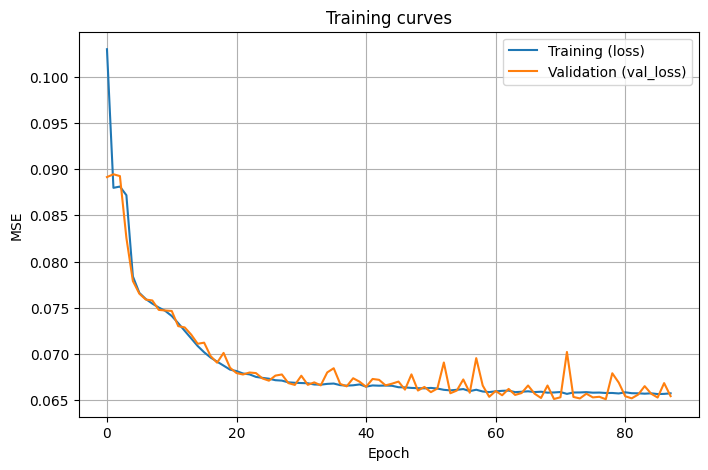

In [19]:
# ===============================
# 1. Curvas de entrenamiento
# ===============================
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training (loss)')
plt.plot(history.history['val_loss'], label='Validation (val_loss)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training curves')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
# === 1. Gráfica de pérdidas y MAE ===
plt.figure(figsize=(5,10))

# Pérdida
plt.subplot(2, 1, 1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Loss during training")
plt.legend()
plt.grid(True)

# MAE
plt.subplot(2, 1, 2)
plt.plot(history.history["mae"], label="Train MAE")
plt.plot(history.history["val_mae"], label="Validation MAE")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.title("Mean Absolute Error during training")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig("grafica_entrenamiento.jpg", dpi=300)  # 🔹 Se guarda como JPG
plt.close()

299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


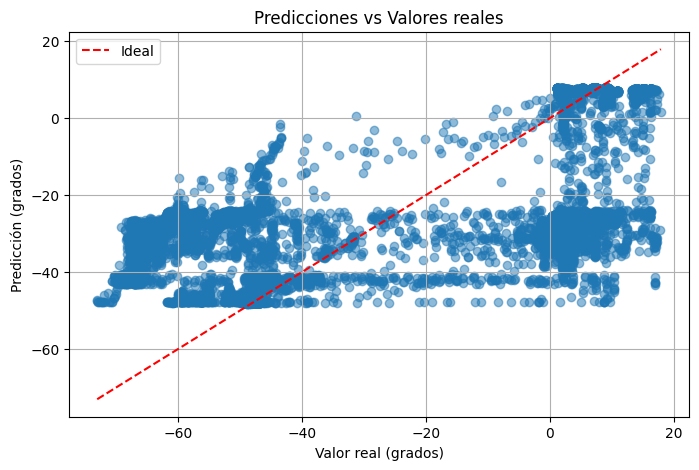

In [18]:
# ===============================
# 2. Predicciones vs Valores reales
# ===============================
# Predicciones en test
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)   # Desescalar a grados
y_real = scaler_y.inverse_transform(y_test)          # Valores reales

plt.figure(figsize=(8,5))
plt.scatter(y_real, y_pred, alpha=0.5)
plt.plot([y_real.min(), y_real.max()],
         [y_real.min(), y_real.max()],
         'r--', label="Ideal")
plt.xlabel("Valor real (grados)")
plt.ylabel("Predicción (grados)")
plt.title("Predicciones vs Valores reales")
plt.legend()
plt.grid(True)
plt.show()